# Ejemplo de FIS tipo Sugeno

In [4]:
import numpy as np
from FuzzySystem.FuzzySet import FuzzySet
from FuzzySystem.FuzzyVariable import FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import FuzzyInferenceSystem
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, Trapmf
from FuzzySystem.FuzzyInferenceSystem import FuzzyRule, Antecedent, TSKConsequent

In [5]:
def f1(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output1 = TSKConsequent(params=np.array([1,1.5,2]), function=f1)

def f2(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output2 = TSKConsequent(params=np.array([2,2.5,2.5]), function=f2)

def f3(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output3 = TSKConsequent(params=np.array([3,3.5,3]), function=f3)

def f4(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output4 = TSKConsequent(params=np.array([4,4.5,3.5]), function=f4)

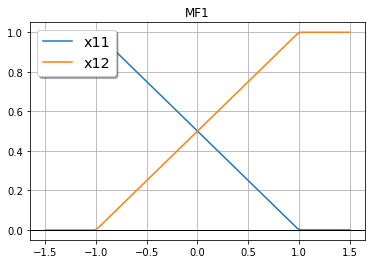

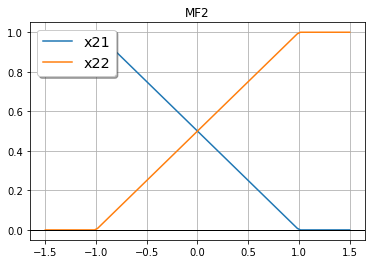


Evaluation of FIS with inputs:
('MF1', -0.3)
('MF2', 0.6)
	IF TODO THEN f = [0.13]
	IF TODO THEN f = [0.52]
	IF TODO THEN f = [0.06999999999999999]
	IF TODO THEN f = [0.27999999999999997]


In [6]:
#INPUTS
x11 = FuzzySet('x11', Trapmf([-1.5,-1.5,-1,1]))
x12 = FuzzySet('x12', Trapmf([-1,1,1.5,1.5]))
mf1 = FuzzyVariable('MF1',[x11, x12], universe=[-1.5, 1.5])
mf1.show()

x21 = FuzzySet('x21', Trapmf([-1.5,-1.5,-1,1]))
x22 = FuzzySet('x22', Trapmf([-1,1,1.5,1.5]))
mf2 = FuzzyVariable('MF2',[x21, x22], universe=[-1.5, 1.5])
mf2.show()

#OUTPUT
def f(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output1 = TSKConsequent(params=np.array([1,1.5,2]), function=f)

def f2(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output2 = TSKConsequent(params=np.array([2,2.5,2.5]), function=f2)

def f3(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output3 = TSKConsequent(params=np.array([3,3.5,3]), function=f3)

def f4(x1, x2, c0, c1, c2): return c0+c1*x1+c2*x2
output4 = TSKConsequent(params=np.array([4,4.5,3.5]), function=f4)

#RULES

ant1  = Antecedent(mf1['x11'] & mf2['x21'])
rule1 = FuzzyRule(ant1, output1)

ant2  = Antecedent(mf1['x11'] & mf2['x22'])
rule2 = FuzzyRule(ant2, output2)

ant3  = Antecedent(mf1['x12'] & mf2['x21'])
rule3 = FuzzyRule(ant3, output3)

ant4  = Antecedent(mf1['x12'] & mf2['x22'])
rule4 = FuzzyRule(ant4, output4)

#Building the FIS

fis = FuzzyInferenceSystem([rule1, rule2, rule3, rule4], and_op='prod', or_op='sum')

#FIS Evaluation

inputs = (('MF1',np.float(-0.3)), ('MF2',np.float(0.6)))
result = fis.eval(inputs)

In [7]:
from FuzzySystem.Defuzzifier import TSKDefuzzifier

TSKDefuzzifier(result).eval()

3.25